# пример использования парсера

In [1]:
# !pip install -U ipympl matplotlib
# !pip install -U pyquaternion transforms3d

In [2]:
%load_ext autoreload
%autoreload 2

import os, sys, pickle
import matplotlib.pyplot as plt
# from mpl_toolkits import mplot3d
import numpy as np
from transforms3d.euler import euler2mat, mat2euler

from scipy.spatial.transform import Rotation

# import math
# from pyquaternion import Quaternion
# from tqdm import tqdm
%matplotlib inline

In [3]:
data_path = 'bvh_data/'
file_pathes = !ls {data_path}*.bvh

# переведем bvh file в структуру BVH

In [4]:
import bvh as bvh

In [5]:
print('Содержится файлов данного формата:', len(file_pathes))
# выберем один из них по номеру
file_path = file_pathes[33]
name = file_path.split('/')[-1].split('.')[0]
print('Выбран:', file_path.split('/')[-1])


# create Bvh parser
anim = bvh.Bvh()
# parser file
anim.parse_file(file_path)

Содержится файлов данного формата: 77
Выбран: multipleActions1_subject2.bvh


In [6]:
anim.frames

4587

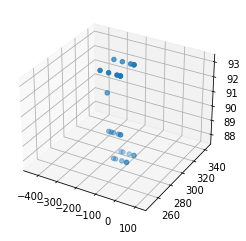

In [7]:
anim.plot_hierarchy()

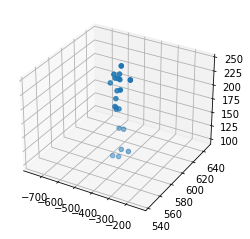

In [8]:
# draw the skeleton for the given frame
anim.plot_frame(22)

# теперь конвертируем обратно в файл

In [9]:
anim.write_to_bvh('output.bvh')

Wrote "output.bvh"


# на основании 3D координат создание объекта bvh.Bvh()

**обязательные** входные параметры:

In [10]:
# fps для видео-объекта
FPS = 30

In [11]:
# 3D-координаты частей тела p
p, _ = anim.all_frame_poses()
p.shape

(4587, 27, 3)

In [12]:
with open('default_bvh_parameters/lafan/init_offsets.pickle', 'rb') as f:
    init_offsets = pickle.load(f)
init_offsets

{'Hips': array([-224.2155  ,   91.52404 ,  295.415894]),
 'LeftUpLeg': array([ 0.103456,  1.857823, 10.548498]),
 'LeftLeg': array([ 4.35e+01, -1.90e-05, -2.00e-06]),
 'LeftFoot': array([ 4.2372204e+01,  2.7000000e-05, -5.0000000e-06]),
 'LeftToe': array([ 1.7299999e+01, -1.0000000e-06,  0.0000000e+00]),
 'LeftToe_end': array([0., 0., 0.]),
 'RightUpLeg': array([  0.103456,   1.857824, -10.548502]),
 'RightLeg': array([ 4.3500038e+01, -1.5000000e-05,  1.7000000e-05]),
 'RightFoot': array([ 4.2372261e+01, -1.5000000e-05,  1.5000000e-05]),
 'RightToe': array([ 1.7299984e+01, -7.0000000e-06, -2.0000000e-06]),
 'RightToe_end': array([0., 0., 0.]),
 'Spine': array([ 6.901968e+00, -2.603745e+00, -5.000000e-06]),
 'Spine1': array([1.25881e+01, 1.40000e-05, 1.30000e-05]),
 'Spine2': array([ 1.2343204e+01,  8.0000000e-06, -1.0000000e-05]),
 'Neck': array([2.5832903e+01, 2.0000000e-06, 1.0000000e-05]),
 'Head': array([ 1.1766598e+01,  1.5000000e-05, -0.0000000e+00]),
 'Head_end': array([0., 0., 

In [13]:
with open('default_bvh_parameters/lafan/parent_name_dict.pickle', 'rb') as f:
    parent_name_dict = pickle.load(f)
parent_name_dict

{'Hips': None,
 'LeftUpLeg': 'Hips',
 'LeftLeg': 'LeftUpLeg',
 'LeftFoot': 'LeftLeg',
 'LeftToe': 'LeftFoot',
 'LeftToe_end': 'LeftToe',
 'RightUpLeg': 'Hips',
 'RightLeg': 'RightUpLeg',
 'RightFoot': 'RightLeg',
 'RightToe': 'RightFoot',
 'RightToe_end': 'RightToe',
 'Spine': 'Hips',
 'Spine1': 'Spine',
 'Spine2': 'Spine1',
 'Neck': 'Spine2',
 'Head': 'Neck',
 'Head_end': 'Head',
 'LeftShoulder': 'Spine2',
 'LeftArm': 'LeftShoulder',
 'LeftForeArm': 'LeftArm',
 'LeftHand': 'LeftForeArm',
 'LeftHand_end': 'LeftHand',
 'RightShoulder': 'Spine2',
 'RightArm': 'RightShoulder',
 'RightForeArm': 'RightArm',
 'RightHand': 'RightForeArm',
 'RightHand_end': 'RightHand'}

In [14]:
# и соответствие имен номерам в массиве p
with open('default_bvh_parameters/lafan/joint_name_index.pickle', 'rb') as f:
    joint_name_index = pickle.load(f)
joint_name_index

{'Hips': 0,
 'LeftUpLeg': 1,
 'LeftLeg': 2,
 'LeftFoot': 3,
 'LeftToe': 4,
 'LeftToe_end': 5,
 'RightUpLeg': 6,
 'RightLeg': 7,
 'RightFoot': 8,
 'RightToe': 9,
 'RightToe_end': 10,
 'Spine': 11,
 'Spine1': 12,
 'Spine2': 13,
 'Neck': 14,
 'Head': 15,
 'Head_end': 16,
 'LeftShoulder': 17,
 'LeftArm': 18,
 'LeftForeArm': 19,
 'LeftHand': 20,
 'LeftHand_end': 21,
 'RightShoulder': 22,
 'RightArm': 23,
 'RightForeArm': 24,
 'RightHand': 25,
 'RightHand_end': 26}

далее все автоматически

In [15]:
%%time
new_anim = bvh.Bvh()
new_anim.extract_from_3D(p, parent_name_dict, joint_name_index, FPS, init_offsets)


# и проверка
new_anim.write_to_bvh('new_output.bvh')

Wrote "new_output.bvh"
CPU times: user 12 s, sys: 5.84 ms, total: 12 s
Wall time: 12 s


# проверим

In [16]:
test_anim = bvh.Bvh()
test_anim.parse_file('new_output.bvh')

test_poses, test_angles = test_anim.all_frame_poses()


np.max(test_poses - p),\
np.max(anim.get_initial_poses() - test_anim.get_initial_poses())

(1.9218239316387553e-05, 0.0)

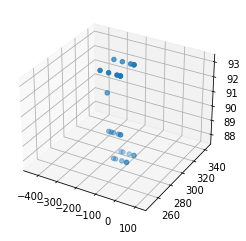

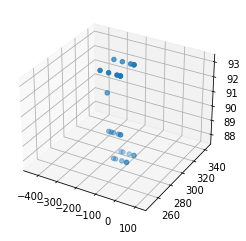

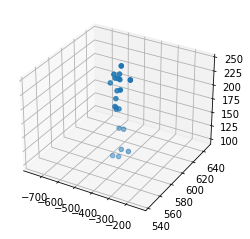

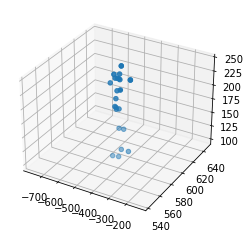

In [17]:
anim.plot_hierarchy()
test_anim.plot_hierarchy()

anim.plot_frame(22)
test_anim.plot_frame(22)

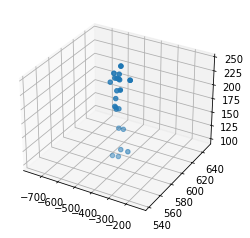

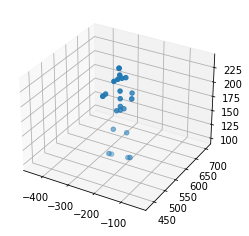

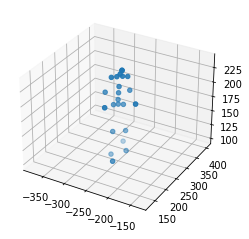

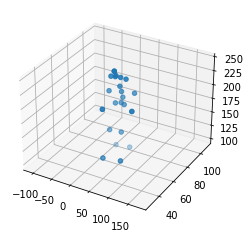

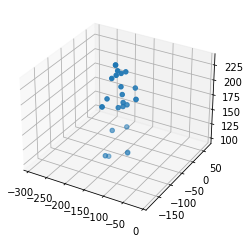

In [18]:
for i in range(test_anim.frames):
    if i % 1000:
        continue
    test_anim.plot_frame(i)

# генерация супорт файлов для aist датасета

In [19]:
bones = \
[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (3, 4),
 (5, 7),
 (6, 8),
 (7, 9),
 (8, 10),
 (11, 13),
 (12, 14),
 (13, 15),
 (14, 16)]

len(bones)

14

In [20]:
names = [
"nose", 
"left_eye", "right_eye", "left_ear", "right_ear", "left_shoulder","right_shoulder", 
"left_elbow", "right_elbow", "left_wrist", "right_wrist", "left_hip", "right_hip", 
"left_knee", "right_knee", "left_ankle", "right_ankle"
]
for i in names:
    print(i.replace('_', ' '))

nose
left eye
right eye
left ear
right ear
left shoulder
right shoulder
left elbow
right elbow
left wrist
right wrist
left hip
right hip
left knee
right knee
left ankle
right ankle


In [21]:
parent_name_dict = {
    'nose': '',
    'left_eye': '',
    'right_eye': '',
    'left_ear': '',
    'right_ear': '',
    'left_shoulder': '',
    'right_shoulder': '',
    'left_elbow': '',
    'right_elbow': '',
    'left_wrist': '',
    'right_wrist': '',
    'left_hip': '',
    'right_hip': '',
    'left_knee': '',
    'right_knee': '',
    'left_ankle': '',
    'right_ankle': ''
}

with open('default_bvh_parameters/COCOskeleton/parent_name_dict.pickle', 'wb') as f:
    pickle.dump(parent_name_dict, f)

In [22]:
joint_name_index = {
    'nose': 0,
    'left_eye': 1,
    'right_eye': 2,
    'left_ear': 3,
    'right_ear': 4,
    'left_shoulder': 5,
    'right_shoulder': 6,
    'left_elbow': 7,
    'right_elbow': 8,
    'left_wrist': 9,
    'right_wrist': 10,
    'left_hip': 11,
    'right_hip': 12,
    'left_knee': 13,
    'right_knee': 14,
    'left_ankle': 15,
    'right_ankle': 16
}

with open('default_bvh_parameters/COCOskeleton/joint_name_index.pickle', 'wb') as f:
    pickle.dump(parent_name_dict, f)

In [23]:
init_offsets = {
    'nose': (0.0, 0.0, 0.0),
    'left_eye': (0.0, 0.0, 0.0),
    'right_eye': (0.0, 0.0, 0.0),
    'left_ear': (0.0, 0.0, 0.0),
    'right_ear': (0.0, 0.0, 0.0),
    'left_shoulder': (0.0, 0.0, 0.0),
    'right_shoulder': (0.0, 0.0, 0.0),
    'left_elbow': (0.0, 0.0, 0.0),
    'right_elbow': (0.0, 0.0, 0.0),
    'left_wrist': (0.0, 0.0, 0.0),
    'right_wrist': (0.0, 0.0, 0.0),
    'left_hip': (0.0, 0.0, 0.0),
    'right_hip': (0.0, 0.0, 0.0),
    'left_knee': (0.0, 0.0, 0.0),
    'right_knee': (0.0, 0.0, 0.0),
    'left_ankle': (0.0, 0.0, 0.0),
    'right_ankle': (0.0, 0.0, 0.0)
}

with open('default_bvh_parameters/COCOskeleton/init_offsets.pickle', 'wb') as f:
    pickle.dump(init_offsets, f)